In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [38]:
skills = {1:{'p':0.1, 'v':240}, 
          2:{'p':0.2, 'v':120}, 
          3:{'p':0.3, 'v':80}, 
          4:{'p':0.4, 'v':60}, 
          5:{'p':0.5, 'v':48},
          6:{'p':0.6, 'v':40}}

In [39]:
expected_unskilled = 1
for key in skills:
    expected_unskilled *= (1-skills[key]['p'])
print("expected number of unskilled persons in a sample of 100 is", 100*expected_unskilled)

expected number of unskilled persons in a sample of 100 is 6.048000000000001


In [40]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

### Value distribution

mean:144.00000000000009, sd: 103.22790320451138


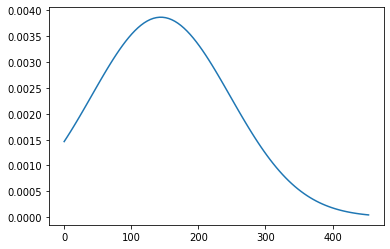

In [41]:
mean = 0
m2 = 0

skill_combinations = list(powerset([key for key in skills]))

skill_value_distribution = {}
    
for skill_comb in skill_combinations:
    value = 0
    prob = 1
    for key in skill_comb:
        value += skills[key]['v']
        prob *= skills[key]['p']
        
    for key in list(set([key for key in skills])-set(skill_comb)):
        prob *= (1-skills[key]['p'])

    if value in skill_value_distribution.keys():
        skill_value_distribution[value] += prob
    else:
        skill_value_distribution[value] = prob

for skill_value in skill_value_distribution:
    mean += skill_value_distribution[skill_value] * skill_value
    m2 += skill_value_distribution[skill_value] * skill_value**2
    
#print("sanity check: ", sum(skill_value_distribution.values()))

sd = np.sqrt(m2 - mean**2)
print(f"mean:{mean}, sd: {sd}")

x = np.linspace(0, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.show()

### Required initial income distribution

In [31]:
def distribute(distribution_function):
    n = 1000000
    k = 1000
    values = np.zeros(n)
    for i in range(n):
        values[i] = distribution_function()
    max_value = max(values)
    min_value = min(values)
    bin_size = (max_value - min_value)/k
    distribution = np.zeros(k+1)
    for value in values:
        distribution[int(value/bin_size)] += 1
    return distribution

In [79]:
def income_distribution():
    return min(max(0,np.random.randn()*1.65+4.15), 17)

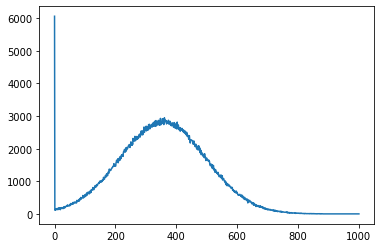

In [80]:
distribution = distribute(income_distribution)
plt.plot(distribution)

### Payroll from capital

In [6]:
#Required payroll

#mean = $50,000/12 ≈ $4,150, sd = $20,000/12 ≈ $1,650

In [84]:
def marginal_contribution_of_employee(capital, v):
    return (np.sqrt(capital**2+v) - capital)

In [85]:
marginal_contribution_of_employee(1573,144)

0.04577174346718493

In [86]:
4.15/0.04577174346718493

90.6672913382741

### Redundant

In [80]:
def distribute(values):
    k = 1000
    values = np.array(values)
    max_value = max(values)
    min_value = min(values)
    bin_size = (max_value - min_value)/k
    distribution = np.zeros(int(k*max_value/(max_value-min_value))+1)
    for value in values:
        distribution[int(value/bin_size)] += 1
    return distribution

In [87]:
#plt.hist(distribute(wealth)[:100])
#plt.savefig(f"tax={income_tax_rate}.jpg")
#plt.show()

### Test

In [88]:
np.arange(40)/80+0.1

array([0.1   , 0.1125, 0.125 , 0.1375, 0.15  , 0.1625, 0.175 , 0.1875,
       0.2   , 0.2125, 0.225 , 0.2375, 0.25  , 0.2625, 0.275 , 0.2875,
       0.3   , 0.3125, 0.325 , 0.3375, 0.35  , 0.3625, 0.375 , 0.3875,
       0.4   , 0.4125, 0.425 , 0.4375, 0.45  , 0.4625, 0.475 , 0.4875,
       0.5   , 0.5125, 0.525 , 0.5375, 0.55  , 0.5625, 0.575 , 0.5875])